In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import time 
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 400)

###### Import Player Data

In [93]:
player_data = pd.read_csv('player_data.csv', sep=',')

In [94]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Raids,Total Tackles,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,1,Pardeep Narwal,Patna Pirates,1782,34,101,1055,798,1048,10.48,133,46,54,54,7,0.07,1,0
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,182,117,991,766,933,7.97,161,24,40,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,229,119,905,670,820,6.89,161,20,29,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,1687,82,115,811,640,790,6.87,163,23,29,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,1384,103,88,689,535,650,7.47,106,14,25,25,39,0.44,2,1


In [95]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 18 columns):
Player Rank              388 non-null int64
Player Name              388 non-null object
Latest Team              388 non-null object
Total Raids              388 non-null int64
Total Tackles            388 non-null int64
Matches Played           388 non-null int64
Total Points             388 non-null int64
Successful Raids         388 non-null int64
Raid Points              388 non-null int64
Average Raid Points      388 non-null float64
Do or Die Raid Points    388 non-null int64
Super Raids              388 non-null int64
Super 10s                388 non-null int64
Successful Tackles       388 non-null int64
Tackle Points            388 non-null int64
Average Tackle Points    388 non-null float64
Super Tackles            388 non-null int64
High 5s                  388 non-null int64
dtypes: float64(2), int64(14), object(2)
memory usage: 54.6+ KB


### Start With Task 7: Predict the player with the highest SUCCESSFUL TACKLE percentage 

###### For this task, we require only tackles data, we will delete all raids related data from the dataframe. Columns to be dropped from the dataframe are: "Total Raids", "Successful Raids",  "Do or Die Raid Points", "Raid Points", "Average Raid Points", "Super Raids" & "Super 10s"

In [96]:
player_data.drop(columns = ['Total Raids', "Successful Raids", "Raid Points", "Average Raid Points", "Do or Die Raid Points", "Super Raids", "Super 10s" ], inplace = True)

In [97]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,1,Pardeep Narwal,Patna Pirates,34,101,1055,54,7,0.07,1,0
1,2,Rahul Chaudhari,Tamil Thalaivas,182,117,991,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,229,119,905,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,82,115,811,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,103,88,689,25,39,0.44,2,1


In [98]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
Player Rank              388 non-null int64
Player Name              388 non-null object
Latest Team              388 non-null object
Total Tackles            388 non-null int64
Matches Played           388 non-null int64
Total Points             388 non-null int64
Successful Tackles       388 non-null int64
Tackle Points            388 non-null int64
Average Tackle Points    388 non-null float64
Super Tackles            388 non-null int64
High 5s                  388 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 33.4+ KB


###### Data Cleanup: Delete all rows where total tackles are 0. 

In [99]:
player_data[player_data['Total Tackles'] == 0]

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
59,60,Surjeet Narwal,Bengal Warriors,0,31,174,7,14,0.45,2,0
81,82,Sonu Narwal,Puneri Paltan,0,33,138,1,0,0.00,0,0
83,84,Sunil Jaipal,Bengaluru Bulls,0,38,125,0,38,1.00,9,1
116,115,Sandeep Kandola,Telugu Titans,0,16,70,0,59,3.69,4,6
117,118,Jitesh Joshi,Puneri Paltan,0,19,69,0,16,0.84,2,2
119,120,Pravin Niwale,Delhi Dabangs,0,17,64,1,2,0.12,0,0
129,130,Prashant Chavan,Delhi Dabangs,0,41,57,0,56,1.37,6,2
134,135,Shyam Kumar Sah,Bengal Warriors,0,27,53,0,36,1.33,2,1
139,138,Sachin Khambe,Puneri Paltan,0,22,51,0,46,2.09,6,2
142,143,Vinod Kumar,Puneri Paltan,0,27,48,0,48,1.78,0,1


In [100]:
player_data[player_data['Total Tackles'] == 0].count()

Player Rank              104
Player Name              104
Latest Team              104
Total Tackles            104
Matches Played           104
Total Points             104
Successful Tackles       104
Tackle Points            104
Average Tackle Points    104
Super Tackles            104
High 5s                  104
dtype: int64

###### There are a total of 104 rows to be deleted 

In [101]:
player_data = player_data[player_data['Total Tackles'] > 0] 

In [102]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,1,Pardeep Narwal,Patna Pirates,34,101,1055,54,7,0.07,1,0
1,2,Rahul Chaudhari,Tamil Thalaivas,182,117,991,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,229,119,905,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,82,115,811,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,103,88,689,25,39,0.44,2,1


In [103]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 386
Data columns (total 11 columns):
Player Rank              284 non-null int64
Player Name              284 non-null object
Latest Team              284 non-null object
Total Tackles            284 non-null int64
Matches Played           284 non-null int64
Total Points             284 non-null int64
Successful Tackles       284 non-null int64
Tackle Points            284 non-null int64
Average Tackle Points    284 non-null float64
Super Tackles            284 non-null int64
High 5s                  284 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 26.6+ KB


In [104]:
player_data[player_data['Total Tackles'] == 0].count()

Player Rank              0
Player Name              0
Latest Team              0
Total Tackles            0
Matches Played           0
Total Points             0
Successful Tackles       0
Tackle Points            0
Average Tackle Points    0
Super Tackles            0
High 5s                  0
dtype: int64

###### Check for Rows where Successful Tackles  > Total Tackles & delete those rows. This is a data issue as successful tackles cannot be greater then total tackles

In [105]:
player_data[player_data['Successful Tackles'] > player_data['Total Tackles']] 

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,1,Pardeep Narwal,Patna Pirates,34,101,1055,54,7,0.07,1,0
20,21,Naveen Kumar,Delhi Dabangs,17,38,376,23,7,0.18,1,0
25,26,Siddharth Sirish Desai,Telugu Titans,14,36,349,16,6,0.17,0,0


###### 3 rows to be deleted

In [106]:
player_data = player_data[player_data['Successful Tackles'] <= player_data['Total Tackles']] 

In [107]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
1,2,Rahul Chaudhari,Tamil Thalaivas,182,117,991,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,229,119,905,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,82,115,811,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,103,88,689,25,39,0.44,2,1
5,6,Maninder Singh,Bengal Warriors,43,75,673,29,9,0.12,1,0


In [108]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 1 to 386
Data columns (total 11 columns):
Player Rank              281 non-null int64
Player Name              281 non-null object
Latest Team              281 non-null object
Total Tackles            281 non-null int64
Matches Played           281 non-null int64
Total Points             281 non-null int64
Successful Tackles       281 non-null int64
Tackle Points            281 non-null int64
Average Tackle Points    281 non-null float64
Super Tackles            281 non-null int64
High 5s                  281 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 26.3+ KB


In [109]:
player_data['Total Tackles'].value_counts()

1      16
2      10
4       8
8       7
3       7
5       7
10      6
11      6
39      5
6       5
37      5
7       4
13      4
70      4
31      4
29      4
54      4
43      3
51      3
44      3
33      3
82      3
45      3
28      3
24      3
74      3
21      3
20      3
90      3
9       3
19      3
146     2
96      2
46      2
42      2
73      2
57      2
58      2
63      2
83      2
26      2
76      2
85      2
12      2
316     2
88      2
15      2
16      2
18      2
262     2
22      2
23      2
240     2
91      2
93      2
75      1
68      1
72      1
69      1
490     1
65      1
64      1
62      1
61      1
56      1
55      1
53      1
48      1
41      1
547     1
32      1
30      1
531     1
14      1
36      1
92      1
87      1
473     1
107     1
195     1
200     1
220     1
221     1
229     1
242     1
246     1
251     1
255     1
270     1
281     1
283     1
287     1
289     1
312     1
318     1
325     1
332     1
336     1
351     1
356     1


###### We will consider benchmark of minimum 20 tackles for a player to classify for this prediction.

In [110]:
player_data[player_data['Successful Tackles'] == 0 ]

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
26,27,Ravinder Pahal,Delhi Dabangs,619,105,321,0,307,2.92,19,22
27,28,Ran Singh,Tamil Thalaivas,465,115,320,0,223,1.94,12,4
31,32,Dharmaraj Cheralathan,Haryana Steelers,466,114,294,0,252,2.21,24,12
32,33,Fazel Atrachali,U Mumba,448,95,292,0,288,3.03,18,19
35,36,Mohit Chhillar,Tamil Thalaivas,547,107,283,0,276,2.58,23,18
38,39,PO Surjeet Singh,Puneri Paltan,512,90,269,0,260,2.89,16,24
39,40,Girish Maruti Ernak,Puneri Paltan,555,102,266,0,257,2.52,14,16
41,42,Surender Nada,Haryana Steelers,406,71,243,0,222,3.13,16,19
43,44,Amit Hooda,Jaipur Pink Panthers,420,84,233,0,224,2.67,18,11
44,45,Jeeva Kumar,Bengal Warriors,473,108,222,0,221,2.05,22,5


In [111]:
player_data[player_data['Successful Tackles'] == 0 ].count()

Player Rank              220
Player Name              220
Latest Team              220
Total Tackles            220
Matches Played           220
Total Points             220
Successful Tackles       220
Tackle Points            220
Average Tackle Points    220
Super Tackles            220
High 5s                  220
dtype: int64

In [112]:
player_data[player_data['Total Tackles'] == 0 ].count()

Player Rank              0
Player Name              0
Latest Team              0
Total Tackles            0
Matches Played           0
Total Points             0
Successful Tackles       0
Tackle Points            0
Average Tackle Points    0
Super Tackles            0
High 5s                  0
dtype: int64

###### Delete the 220 player rows where successful tackles are 0

In [113]:
player_data = player_data[player_data['Successful Tackles'] > 0 ]

In [114]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Tackles,Matches Played,Total Points,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
1,2,Rahul Chaudhari,Tamil Thalaivas,182,117,991,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,229,119,905,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,82,115,811,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,103,88,689,25,39,0.44,2,1
5,6,Maninder Singh,Bengal Warriors,43,75,673,29,9,0.12,1,0


In [115]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 196
Data columns (total 11 columns):
Player Rank              61 non-null int64
Player Name              61 non-null object
Latest Team              61 non-null object
Total Tackles            61 non-null int64
Matches Played           61 non-null int64
Total Points             61 non-null int64
Successful Tackles       61 non-null int64
Tackle Points            61 non-null int64
Average Tackle Points    61 non-null float64
Super Tackles            61 non-null int64
High 5s                  61 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 5.7+ KB


###### Change Column Sequence, "Total Raids" before "Successful Tackles"

In [116]:
player_data = player_data[['Player Rank', 'Player Name', 'Latest Team', 'Matches Played', 'Total Points', 'Total Tackles', 'Successful Tackles', 'Tackle Points', 'Average Tackle Points', 'Super Tackles', 'High 5s']]

In [117]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Tackles,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,182,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,229,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,115,811,82,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,88,689,103,25,39,0.44,2,1
5,6,Maninder Singh,Bengal Warriors,75,673,43,29,9,0.12,1,0


In [118]:
player_data = player_data.reset_index(drop = True)

###### We will now derive new column: "Successful Tackle Percentage", which is calculated as Successful Tackles / Total Tackles.

In [119]:
successful_tackles = player_data['Successful Tackles']
total_tackles = player_data['Total Tackles']
successful_tackles_percentage = (successful_tackles / total_tackles) * 100

In [120]:
len(successful_tackles_percentage)

61

In [121]:
for i in range(0, len(successful_tackles_percentage) ):
    successful_tackles_percentage[i] = math.log(successful_tackles_percentage[i])

###### Insert new column "Successful Tackles Percentage" before the column "Tackle Points"

In [122]:
player_data.insert(7, "Successful Tackles Percentage", successful_tackles_percentage)

In [123]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Tackles,Successful Tackles,Successful Tackles Percentage,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,2,Rahul Chaudhari,Tamil Thalaivas,117,991,182,40,3.090043,58,0.50,5,0
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,229,29,2.538744,85,0.71,8,4
2,4,Ajay Thakur,Tamil Thalaivas,115,811,82,29,3.565747,21,0.18,0,0
3,5,Rohit Kumar,Bengaluru Bulls,88,689,103,25,3.189317,39,0.44,2,1
4,6,Maninder Singh,Bengal Warriors,75,673,43,29,4.211266,9,0.12,1,0


In [124]:
player_data[player_data['Successful Tackles Percentage'] == 0].count()

Player Rank                      0
Player Name                      0
Latest Team                      0
Matches Played                   0
Total Points                     0
Total Tackles                    0
Successful Tackles               0
Successful Tackles Percentage    0
Tackle Points                    0
Average Tackle Points            0
Super Tackles                    0
High 5s                          0
dtype: int64

In [125]:
player_data = player_data[player_data['Successful Tackles Percentage'] > 0]

In [126]:
player_data = player_data.reset_index(drop = True)

In [127]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Tackles,Successful Tackles,Successful Tackles Percentage,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,2,Rahul Chaudhari,Tamil Thalaivas,117,991,182,40,3.090043,58,0.50,5,0
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,229,29,2.538744,85,0.71,8,4
2,4,Ajay Thakur,Tamil Thalaivas,115,811,82,29,3.565747,21,0.18,0,0
3,5,Rohit Kumar,Bengaluru Bulls,88,689,103,25,3.189317,39,0.44,2,1
4,6,Maninder Singh,Bengal Warriors,75,673,43,29,4.211266,9,0.12,1,0


In [128]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
Player Rank                      58 non-null int64
Player Name                      58 non-null object
Latest Team                      58 non-null object
Matches Played                   58 non-null int64
Total Points                     58 non-null int64
Total Tackles                    58 non-null int64
Successful Tackles               58 non-null int64
Successful Tackles Percentage    58 non-null float64
Tackle Points                    58 non-null int64
Average Tackle Points            58 non-null float64
Super Tackles                    58 non-null int64
High 5s                          58 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 5.5+ KB


###### Delete the columns "Total Tackles" & "Successful Tackles", as "Successful Tackles Percentage" to be predicted by the linear model is derived from these two columns. Also "Average Tcakle Points" is derived from "Total Tackles" and to be deleted

In [129]:
player_data.drop(columns = ['Total Tackles', 'Successful Tackles', 'Average Tackle Points'], inplace = True)

In [130]:
player_data = player_data.reset_index(drop = True)

In [131]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
0,2,Rahul Chaudhari,Tamil Thalaivas,117,991,3.090043,58,5,0
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,2.538744,85,8,4
2,4,Ajay Thakur,Tamil Thalaivas,115,811,3.565747,21,0,0
3,5,Rohit Kumar,Bengaluru Bulls,88,689,3.189317,39,2,1
4,6,Maninder Singh,Bengal Warriors,75,673,4.211266,9,1,0


Copy the player_data frame to a new dataframe: player_data_final_tackle_predictions to make predictions based on the model being derived

In [132]:
player_data_final_tackle_predictions = player_data.copy()

In [133]:
player_data_final_tackle_predictions.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
0,2,Rahul Chaudhari,Tamil Thalaivas,117,991,3.090043,58,5,0
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,2.538744,85,8,4
2,4,Ajay Thakur,Tamil Thalaivas,115,811,3.565747,21,0,0
3,5,Rohit Kumar,Bengaluru Bulls,88,689,3.189317,39,2,1
4,6,Maninder Singh,Bengal Warriors,75,673,4.211266,9,1,0


###### Also drop columns: "Player Rank", "Player Name", "Latest Team" that have no bearing on analysis

In [134]:
player_data.drop(columns = ['Player Rank', 'Player Name', 'Latest Team'], inplace = True)

In [135]:
player_data.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
0,117,991,3.090043,58,5,0
1,119,905,2.538744,85,8,4
2,115,811,3.565747,21,0,0
3,88,689,3.189317,39,2,1
4,75,673,4.211266,9,1,0


###### Split the player dataframe into train and test sets

In [136]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(player_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [137]:
df_test.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
26,74,279,2.603690,2,0,0
43,29,141,2.962942,7,0,0
33,53,189,2.040221,8,1,0
12,63,446,2.967561,20,2,0
49,16,86,0.820981,24,2,1


In [138]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 26 to 54
Data columns (total 6 columns):
Matches Played                   18 non-null int64
Total Points                     18 non-null int64
Successful Tackles Percentage    18 non-null float64
Tackle Points                    18 non-null int64
Super Tackles                    18 non-null int64
High 5s                          18 non-null int64
dtypes: float64(1), int64(5)
memory usage: 1008.0 bytes


In [139]:
df_train.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
41,33,155,1.366492,16,2,0
40,55,155,1.966113,6,0,0
25,76,290,1.948413,14,2,0
45,45,100,0.430783,18,1,0
32,54,192,1.714798,10,0,0


In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 41 to 8
Data columns (total 6 columns):
Matches Played                   40 non-null int64
Total Points                     40 non-null int64
Successful Tackles Percentage    40 non-null float64
Tackle Points                    40 non-null int64
Super Tackles                    40 non-null int64
High 5s                          40 non-null int64
dtypes: float64(1), int64(5)
memory usage: 2.2 KB


###### Rescale Features using Min Max Scaler

In [141]:
scaler = MinMaxScaler()
num_vars = ['Matches Played', 'Total Points', 'Successful Tackles Percentage', 'Tackle Points', 'Super Tackles', 'High 5s' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
41,0.196262,0.127907,0.309010,0.141593,0.250,0.0
40,0.401869,0.127907,0.454657,0.053097,0.000,0.0
25,0.598131,0.284884,0.450358,0.123894,0.250,0.0
45,0.308411,0.063953,0.081728,0.159292,0.125,0.0
32,0.392523,0.170930,0.393613,0.088496,0.000,0.0


###### Divide into X & Y. Y = 'Successful Tackles Percentage'

In [142]:
y_train = df_train.pop('Successful Tackles Percentage')
X_train = df_train

In [143]:
y_train.head()

41    0.309010
40    0.454657
25    0.450358
45    0.081728
32    0.393613
Name: Successful Tackles Percentage, dtype: float64

In [144]:
X_train.head()

,Matches Played,Total Points,Tackle Points,Super Tackles,High 5s
41,0.196262,0.127907,0.141593,0.250,0.0
40,0.401869,0.127907,0.053097,0.000,0.0
25,0.598131,0.284884,0.123894,0.250,0.0
45,0.308411,0.063953,0.159292,0.125,0.0
32,0.392523,0.170930,0.088496,0.000,0.0


In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 41 to 8
Data columns (total 5 columns):
Matches Played    40 non-null float64
Total Points      40 non-null float64
Tackle Points     40 non-null float64
Super Tackles     40 non-null float64
High 5s           40 non-null float64
dtypes: float64(5)
memory usage: 1.9 KB


###### Model Selection using RFE 

In [146]:
# Running RFE with the output number of the variable equal to 5
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 5)
rfe = rfe.fit(X_train, y_train)

In [147]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Matches Played', True, 1),
 ('Total Points', True, 1),
 ('Tackle Points', True, 1),
 ('Super Tackles', True, 1),
 ('High 5s', True, 1)]

In [148]:
col = X_train.columns[rfe.support_]
col

Index(['Matches Played', 'Total Points', 'Tackle Points', 'Super Tackles',
       'High 5s'],
      dtype='object')

In [149]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

###### Building model using statsmodel, for the detailed statistics

In [150]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [151]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [152]:
X_train_rfe.head()

,const,Matches Played,Total Points,Tackle Points,Super Tackles,High 5s
41,1.0,0.196262,0.127907,0.141593,0.250,0.0
40,1.0,0.401869,0.127907,0.053097,0.000,0.0
25,1.0,0.598131,0.284884,0.123894,0.250,0.0
45,1.0,0.308411,0.063953,0.159292,0.125,0.0
32,1.0,0.392523,0.170930,0.088496,0.000,0.0


In [153]:
# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Successful Tackles Percentage   R-squared:                       0.690
Model:                                       OLS   Adj. R-squared:                  0.645
Method:                            Least Squares   F-statistic:                     15.15
Date:                           Sun, 22 Sep 2019   Prob (F-statistic):           7.80e-08
Time:                                   16:06:28   Log-Likelihood:                 20.951
No. Observations:                             40   AIC:                            -29.90
Df Residuals:                                 34   BIC:                            -19.77
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [154]:
# Drop the column "High 5s" from the model (P-Value: 0.620)
X_train_new = X_train_rfe.drop(["High 5s"], axis = 1)

In [155]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [156]:
print(lm.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Successful Tackles Percentage   R-squared:                       0.688
Model:                                       OLS   Adj. R-squared:                  0.652
Method:                            Least Squares   F-statistic:                     19.28
Date:                           Sun, 22 Sep 2019   Prob (F-statistic):           1.84e-08
Time:                                   16:06:29   Log-Likelihood:                 20.804
No. Observations:                             40   AIC:                            -31.61
Df Residuals:                                 35   BIC:                            -23.16
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [157]:
X_train_new.columns

Index(['const', 'Matches Played', 'Total Points', 'Tackle Points',
       'Super Tackles'],
      dtype='object')

In [158]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.72
1,Matches Played,3.81
2,Total Points,3.52
3,Tackle Points,3.44
4,Super Tackles,3.38


In [159]:
# Drop the column "Super Tackles" (P-Value: 0.583)
X_train_new = X_train_new.drop(["Super Tackles"], axis = 1)

In [160]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Successful Tackles Percentage   R-squared:                       0.685
Model:                                       OLS   Adj. R-squared:                  0.659
Method:                            Least Squares   F-statistic:                     26.11
Date:                           Sun, 22 Sep 2019   Prob (F-statistic):           3.78e-09
Time:                                   16:06:29   Log-Likelihood:                 20.629
No. Observations:                             40   AIC:                            -33.26
Df Residuals:                                 36   BIC:                            -26.50
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [161]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [162]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Matches Played,9.21
1,Total Points,7.96
2,Tackle Points,2.76


In [163]:
# Drop the column "Matches Played" (VIF: 9.21)
X_train_new = X_train_new.drop(["Matches Played"], axis = 1)

In [164]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Successful Tackles Percentage   R-squared:                       0.491
Model:                                       OLS   Adj. R-squared:                  0.463
Method:                            Least Squares   F-statistic:                     17.83
Date:                           Sun, 22 Sep 2019   Prob (F-statistic):           3.78e-06
Time:                                   16:06:29   Log-Likelihood:                 11.013
No. Observations:                             40   AIC:                            -16.03
Df Residuals:                                 37   BIC:                            -10.96
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [165]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Total Points,2.37
1,Tackle Points,2.37


###### The equation of the initial linear model is Successful Tackles Percentage = ( 0.39 + [ (0.77) * Total Points ] - [ (0.76) * Tackle Points ])

In [166]:
y_train_successful_raids_percentage = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

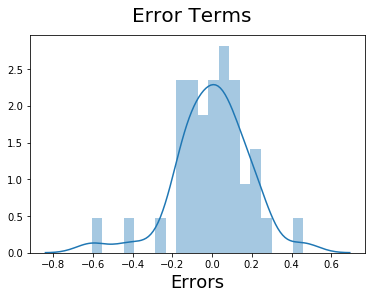

In [167]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_successful_raids_percentage), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###### Error terms are normally distributed with mean centered around 0. We now proceed with 

###### We will now proceed with making predictions on the test dataset

In [168]:
num_vars = ['Matches Played', 'Total Points', 'Successful Tackles Percentage', 'Tackle Points', 'Super Tackles', 'High 5s' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
26,0.579439,0.272093,0.609523,0.017699,0.000,0.00
43,0.158879,0.111628,0.696785,0.061947,0.000,0.00
33,0.383178,0.167442,0.472658,0.070796,0.125,0.00
12,0.476636,0.466279,0.697907,0.176991,0.250,0.00
49,0.037383,0.047674,0.176507,0.212389,0.250,0.25


In [169]:
y_test = df_test.pop('Successful Tackles Percentage')
X_test = df_test

In [170]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [171]:
y_pred = lm.predict(X_test_new)

In [172]:
y_pred.head()

26    0.589028
43    0.432776
33    0.468820
12    0.617392
49    0.270213
dtype: float64

In [173]:
y_pred.count()

18

Text(0, 0.5, 'y_pred')

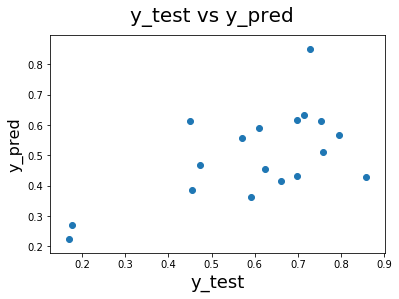

In [174]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

###### Our Final Model is Successful Tackles Percentage = ( 3.44 + [ (39.54) * Matches Played ] - [ (40.68) * Total Points ])

In [175]:
player_data_final_tackle_predictions.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
0,2,Rahul Chaudhari,Tamil Thalaivas,117,991,3.090043,58,5,0
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,2.538744,85,8,4
2,4,Ajay Thakur,Tamil Thalaivas,115,811,3.565747,21,0,0
3,5,Rohit Kumar,Bengaluru Bulls,88,689,3.189317,39,2,1
4,6,Maninder Singh,Bengal Warriors,75,673,4.211266,9,1,0


In [176]:
player_data.head()

,Matches Played,Total Points,Successful Tackles Percentage,Tackle Points,Super Tackles,High 5s
0,117,991,3.090043,58,5,0
1,119,905,2.538744,85,8,4
2,115,811,3.565747,21,0,0
3,88,689,3.189317,39,2,1
4,75,673,4.211266,9,1,0


In [177]:
player_data_final_tackle_predictions = player_data_final_tackle_predictions[['Player Rank', 'Player Name', 'Latest Team']]

In [178]:
player_data_final_tackle_predictions.head()

,Player Rank,Player Name,Latest Team
0,2,Rahul Chaudhari,Tamil Thalaivas
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers
2,4,Ajay Thakur,Tamil Thalaivas
3,5,Rohit Kumar,Bengaluru Bulls
4,6,Maninder Singh,Bengal Warriors


In [179]:
player_data_final_tackle_predictions['Total Points'] = player_data['Total Points']
player_data_final_tackle_predictions['Tackle Points'] = player_data['Tackle Points']

In [181]:
player_data_final_tackle_predictions.head()

,Player Rank,Player Name,Latest Team,Total Points,Tackle Points
0,2,Rahul Chaudhari,Tamil Thalaivas,991,58
1,3,Deepak Niwas Hooda,Jaipur Pink Panthers,905,85
2,4,Ajay Thakur,Tamil Thalaivas,811,21
3,5,Rohit Kumar,Bengaluru Bulls,689,39
4,6,Maninder Singh,Bengal Warriors,673,9


In [182]:
player_data_final_tackle_predictions['Predicted Successful Tackles Percentage'] = (0.39 + (0.77 * player_data_final_tackle_predictions['Total Points'])) -  (0.81 * player_data_final_tackle_predictions['Tackle Points']) 

In [186]:
player_data_final_tackle_predictions = player_data_final_tackle_predictions[['Player Name', 'Latest Team', 'Predicted Successful Tackles Percentage']].sort_values(by='Predicted Successful Tackles Percentage', ascending=False).head()

In [189]:
player_data_final_tackle_predictions[['Player Name', 'Latest Team']].head(1)

,Player Name,Latest Team
0,Rahul Chaudhari,Tamil Thalaivas


### Final prediction: Rahul Chaudhari (Tamil Thalaivas) will top the chart for best successful tackles percentage